## File นี้เป็นตัวอย่างการทำงานของ Machine Learning ที่เกือบจะครบวงจร จะแสดงให้เห็นถึง
1. ### การดึงข้อมูล เปลี่ยนแปลงชนิด เตรียม และ แสดงผล
1. ### สร้าง AI model แบบง่าย


In [1]:
# TensorFlow and tf.keras
import matplotlib.pyplot as plt

# Helper libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)
print(tf.config.list_physical_devices())  # แสดง processor ที่สามารถรัน tensorflow ได้

2.16.2
3.4.1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # get the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# spliting data set into train & test

ถึงแม้ว่าเราจะสำรวจข้อมูลมาก่อนหน้าแล้ว แต่เมื่ออยู่ในโน้ตบุ๊คอีกอัน เราก็ควรจะลองโหลดข้อมูลมาสักตัวเพื่อดูว่าสิ่งต่าง ๆ ยังเป็นอย่างที่เราคิดไหม

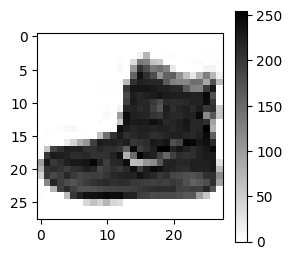

In [3]:
plt.figure(figsize=(3, 3))
# plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.imshow(train_images[0], cmap=plt.cm.gray_r)
plt.colorbar()
plt.grid(False)

In [4]:
# normalisation
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
print(f"total images:{len(train_images)}")
print(train_images[0].shape)

total images:60000
(28, 28)


In [6]:
train_images.dtype

dtype('float64')

In [7]:
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)
train_images.dtype

dtype('float32')

### หยุดคิดสักแปบ มาดูกันก่อนว่าจริงๆแล้วชนิดข้อมูลที่มานั้นมันเป็นชนิดอะไรกันแน่นะ?

In [8]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
print(train_images.dtype)
train_images = train_images.astype(np.float32) / 255
print(train_images.dtype)  # จะเอาอันที่ใช้ Bits(bytes) เยอะกว่า

uint8
float32


### โมเดลในที่นี้จะถูกสร้างขึ้นใฟห้อยู่ในรูแบบ sequential 
หมายถึงว่าการเรียงตัวแบบเป็นชั้นๆ แต่ละเลเยอร์จะส่งข้อมูลจากด้านใดไปด้านหนึ่งเท่านั้น (ซ้ายไปขวา)
โดนจะใส่เมธอด Sequential() ของ keras และนำlayer ใส่ไปใน list 
สามารถทำได้ 2 วิธี

จะสังเกตุได้ว่ามีทั้งหมด 2 วิธีในการสร้างโมเดล
1. เป็นการกำหนดไปเลยว่าเลเยอร์แรกนั้นเป็นแบบ แบน(flatten) ***แต่ไม่กำหนดว่ามี input ขนาดเท่าไหร่***
   <br> ถ้าหากต้องการกำหนดรูปแบบ input ให้ใส่พารามิเตอร์ input_shape=(28,28) แต่จะขึ้น warning
   <br> warning เพราะ keras มองว่า input ไม่ควรเป็น layer เพราะเลเยอร์นี้ไม่ได้แก้ไขค่าอะไรเลยเป็นการส่งตัวแปรเข้าไปเท่านั้น activation fn ก็ไม่มี
1. เป็นการกำหนดไปเลยว่า input จะเป็น array 1 มิติ ที่มีขนาด 28x28 = 784
    <br> แต่ต้องอย่าลืมปรับเปลี่ยน shape ของข้อมูลด้วย

จริงๆแล้วสองวิธีนี้ไม่มีผิดไม่มีถูก ขึ้นอยู่กับว่าถนัดแบบไหน
แต่อย่าลืมว่าข้อดีของการใส่ input คือเราจะเป็นจำนวน parameters ได้เลย

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28) ), 
     keras.layers.Dense(10, activation=tf.nn.softmax)
])

# model = keras.Sequential([
#     keras.Input(shape=(28*28,)),
#     keras.layers.Dense(10, activation=tf.nn.softmax)
# ])
# train_images = train_images.reshape(train_images.shape[0], 784)
# test_images = test_images.reshape(test_images.shape[0], 784)
model.summary()

C:\Users\phuri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(train_images,train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7353 - loss: 0.7824
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8396 - loss: 0.4671
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8500 - loss: 0.4379
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8547 - loss: 0.4229
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8568 - loss: 0.4105


In [10]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 10)                    │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,552 (92.00 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,702 (61.34 KB)

### ลองดู summary ของโมเดลกันก่อน
จะสังเกตุได้ว่าหลังจาก train model ของเราแล้ว settings ต่างๆของพารามิเตอร์นั้นเปลี่ยนไป


## ตรวจสอบความสามารถเครื่องกับชุดข้อมูลที่เครื่องไม่เคยใช้ในการฝึก

ลองฝึกไปแล้วพบว่าเครื่องมันทายแม่นใช้ได้ คือทายถูกประมาณ 85% ของชุดข้อมูลฝึก แต่เป้าหมายของการฝึกของเราคือเอาตัวแบบที่ฝึกแล้วไปใช้กับข้อมูลที่มันไม่เคยเห็น
ดังนั้นเราต้องตรวจสอบว่าที่เครื่องมันดูเก่งขึ้นจากการฝึก มันเก่งแบบจำคำตอบของข้อมูลฝึก หรือว่ามันเข้าใจภาพและทายประเภทเสื้อผ้าได้ดีขึ้นจริง ๆ

เพื่อดำเนินการตรวจสอบ เราจะลองให้เครื่อง predict ชุดข้อมูลทดสอบ แล้วเอาผลที่มันทายไปตรวจดูกับเฉลยว่ามันทายถูกกี่ครั้ง

In [15]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step


**ตรวจดูก่อนว่ามันทายมาตามจำนวนตัวอย่างทดสอบจริง**

In [16]:
len(predictions)

10000

In [17]:
len(test_images)

10000

ถ้าตัวเลขข้างบนเป็น 10,000 ด้วยกันทั้งคู่ แสดงว่าไม่มีปัญหา อันดับต่อไปเราจะมาลองศึกษาดูว่าในตัวอย่างแรกที่มันทายมา มันทายว่าอะไร

In [18]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

โอ๊ะ เวลามันทายตัวอย่างแรก ที่จริงมันพ่นตัวเลขออกมา 10 ค่าต่างหาก ดูเหมือนมันจะไม่ได้บอกมาว่ามันทายว่าเป็นประเภทอะไร แต่มันทายออกมาเป็นความน่าจะเป็นตามที่เราเรียนมาก่อนหน้า ซึ่งถ้าเป็นเช่นนั้นจริง ผลรวมของค่าในอาเรย์นี้ควรจะเป็น 1

In [19]:
sum(predictions[0])

1.0

โอเค ถึงจะไม่ใช่ 1 สนิทแต่มันแม่นยำถึง 8 ตำแหน่ง (รวมเลข 1 ข้างหน้าด้วย) ซึ่งที่มันเป็นแบบนี้เพราะเราใช้ float32 ไม่ใช่ float64 ซึ่งความเที่ยงระดับนี้ ถือว่าเพียงพอกับงาน Deep Learning แล้ว (ในงานจำนวนมากและ GPU ที่ใหม่มาก ๆ มันจะมีโหมด float16 ด้วย)

**คราวนี้เราอยากรู้ว่ามันทายว่าเป็นคลาสหมายเลขอะไรจากคลาส 0 ถึง 9** <br/>
วิธีเขียนโค้ดนั้นง่ายมาก คือเราใช้คำสั่ง np.argmax(predictions[0]) ซึ่งมันจะคืนอินเด็กซ์ที่มีค่าสูงสุดใน predictions[0] ออกมา จุดนี้ตรงตามแนวคิดเกี่ยวกับการเลือกคลาสคำตอบของเราพอดี เพราะเราต้องการเลือกคลาสที่มีความน่าจะเป็นสูงสุดมาเป็นคำตอบ

In [20]:
np.argmax(predictions[0])

9

ลองรันดูแล้วมันบอกว่า 9 ถ้าเราจะให้คอมพิวเตอร์ตรวจว่าถูกหรือเปล่าเราก็ไปเทียบกับ test_labels[0] ได้

In [21]:
test_labels[0]

9

Oh Yeah. ได้ 9 มาทั้งสองจุด แบบนี้แสดงว่าเครื่องทายถูก แม้ว่าจะไม่เคยเห็นภาพนี้มาก่อน แต่ถ้าเราอยากแสดงภาพประกอบออกมาด้วยเพื่อให้เราซึ่งเป็นมนุษย์ตรวจสอบร่วมด้วยได้โดยง่ายเรื่องมันจะยาวมาก แต่เราก็ควรทำมากกว่าที่จะรันไปเรื่อย ๆ โดยไม่เคยมีจินตการเกี่ยวกับสภาพปัญหาประกบคู่ไปด้วย

อันดับแรก เราจะโยงตัวเลขไปกับชื่อ ซึ่งทำได้โดยวิธีที่เราใช้ตอนสำรวจข้อมูลนั่นแหละ

In [22]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [23]:
predicted_class = np.argmax(predictions[0])
class_names[predicted_class]

'Ankle boot'

## การแปลงผลการทายให้เป็นค่าความแม่นยำ
ที่ผ่านมา เราสามารถตรวจสอบความถูกต้องของการทายตัวอย่างที่เราสนใจได้แล้ว อย่างไรก็ตาม โดยมากเราต้องการผลสรุปออกมาเป็นร้อยละของความแม่นยำ อันที่จริงเราจะวนลูปเทียบผลการทายทีละตัวระหว่างกับ test_labels แล้วนับจำนวนครั้งที่ทายถูกก็ได้

แต่การวนลูปพวกนี้มักจะไม่จำเป็น และทำให้การคำนวณช้าด้วย ในตอนนี้เรามีตัวอย่างแค่ระดับหมื่นตัวเราอาจจะยังไม่รู้สึกว่ามันช้า แต่โอกาศที่เราจะพบข้อมูลระดับแสนตัวก็นับว่ามีไม่น้อย ดังนั้นเราจะใช้วิธีอื่น ทำแบบ pythonic style

### ลูกเล่นของ np.argmax
เราอยากได้ลาเบลของคลาสที่เครื่องทายมาของแต่ละภาพ ซึ่งก็คืออินเด็กซ์ของคลาสที่มีความน่าจะเป็นสูงสุด หากเรารัน predictions.shape เราจะพบว่ามันมีขนาดเป็น (10000, 10) ซึ่งก็คือมีหนึ่งหมื่นตัวอย่าง แต่ละตัวอย่างมีผลการทาย 10 คลาส 

หากเรารัน np.argmax(predictions) มันจะวิ่งไปในอาเรย์ทั้งก้อนราวกับว่าอาเรย์ยาวต่อเนื่องเป็นแถวเดียว ไม่ได้เป็นอาเรย์สองมิติอย่างที่ควรเป็น และมันจะคืนค่าอินเด็กซ์ที่มีค่า max มาให้ค่าเดียว แทนที่จะคืนมาให้หมื่นค่าตามจำนวนตัวอย่าง

แต่ np.argmax อนุญาตให้เราระบุแกนมิติในอาเรย์ที่เราจะยึดถือเป็นแกนอ้างอิง เช่นถ้าเราบอกว่า np.argmax(predictions, axis=0) ทางนัมไพจะเอาแกนแรกซึ่งก็คือแถวมาเป็นแกนอ้างอิง นั่นคือในแถวมี 10 คอลัมน์ มันก็จะหาค่า max ในแต่ละคอลัมน์มาให้เป็นคำตอบ

ทว่าสิ่งที่เราต้องการคืออินเด็กซ์ค่า max ในแต่ละแถว ดังนั้นเราต้องสั่งให้ยึดคอลัมน์เป็นแกนอ้างอิง เพื่อที่มันจะได้หาว่าจากแนวตั้งซึ่งมี 10,000 แถว ในแต่ละแถวมีค่า max อยู่ที่อินเด็กซ์ใดบ้าง และนำไปสู่โค้ดที่เรียบง่ายว่า np.argmax(predictions, axis=1)

In [24]:
predictions.shape

(10000, 10)

In [25]:
predicted_classes = np.argmax(predictions, axis=1)

In [26]:
predicted_classes[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 7, 7], dtype=int64)

**อย่าวนลูปเปรียบเทียบค่าระหว่าง NumPy array สองตัว แต่ให้ใช้ฟังก์ชัน np.equal แทน**
ในโค้ดตัวอย่างข้างล่างนี้ เราใช้ฟังก์ชันของนัมไพเปรียบเทียบค่าระหว่างอาเรย์สองตัว ซึ่งมันจะคืนผลลัพธ์มาเป็นอาเรย์อีกอันที่บันทึกว่าคู่ใดมีค่าเท่ากันคู่ใดมีค่าต่างกัน 

ในตัวอย่างนี้ เราเทียบค่าระหว่างอาเรย์ predictted_class และ test_labels และเก็บผลการเทียบไว้ในตัวแปรชื่อ correct ซึ่งหากช่องอาเรย์คู่ใดที่ค่าเท่ากัน ผลลัพธ์ที่อยู่ใน correct จะเป็น True แต่ช่องไหนที่ไม่เท่ากัน ผลลัพธ์ในอาเรย์ correct จะเป็น False

In [27]:
correct = np.equal(predicted_classes, test_labels)

**ลองพิมพ์ค่าใน correct ออกมาดู** สังเกตด้วยว่าอาเรย์ในนัมไพก็เก็บค่าบูลีนได้ ไม่จำเป็นต้องเป็นตัวเลขแต่เพียงอย่างเดียว

In [28]:
correct

array([ True,  True,  True, ...,  True,  True,  True])

In [29]:
correct == True

array([ True,  True,  True, ...,  True,  True,  True])

### วิธีนับค่า True ในอาเรย์บูลีนตามวิถึ pythonic ไม่ควรอาศัยลูป
เวลาจะนับว่าข้างในอาเรย์มี True เราไม่ควรวนลูปแล้วเทียบทีละค่า แต่ให้ใช้ฟังก์ชัน sum ได้เลย ซึ่งไพธอนจะถือว่า True ในกระบวนการบวกมีค่าเป็น 1 และ False มีค่าเป็น 0

ดังนั้นหากเราจะคำนวณร้อยละความถูกต้อง เราสามารถนำจำนวน True ในอาเรย์ correct มาหารด้วยจำนวนตัวอย่างทดสอบทั้งหมด

In [30]:
sum(correct == True) / len(correct)

0.8111

ผลลัพธ์จากตัวอย่างข้างบนแสดงว่าความแม่นยำในชุดข้อมูลทดสอบคือ 84.53%

### ค่าบูลีนในไพธอนรองรับการบวกลบ
ในการบวกลบ ไพธอนถือว่า True มีค่าเป็น 1 และ False มีค่าเป็น 0  ทดสอบดูกับเซลล์ข้างล่างนี้ได้เลย

In [31]:
True + False + True + True + False

3

In [32]:
True - False - True + True - False

1

## มิติใหม่แห่งการแสดงผลการทำนายคลาส แสดงระดับความน่าจะเป็นของแต่ละคลาสมาด้วย
สำหรับมือใหม่ แนวคิดนี้จะดูเหมือนอยู่เหนือจินตนาการมาก คือเราจะแสดงบาร์กราฟว่าแต่ละคลาสมีความน่าจะเป็นเท่าใด และเครื่องทายถูกหรือผิดด้วย โดยถ้าทายถูกจะเป็นสีน้ำเงิน ทายผิดจะเป็นสีแดง วิธีการนี้นอกจากจะช่วยให้เราเข้าใจผลลัพธ์ได้เร็ว มันยังช่วยให้เราเขียนรายงานหรือตีพิมพ์ผลงานวิจัยง่ายด้วย เพราะมันเป็นวิธีที่ทรงพลังในการสื่อสารกับผู้คนมาก

อันดับแรก เราจะเริ่มจากการวาดรูปพร้อมกับลาเบลสีที่แสดงว่ามันทายถูกหรือผิดและทายคลาสที่มันตอบมาด้วยความน่าจะเป็นเท่าใด

In [33]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )

เอาล่ะ คราวนี้มาดูฟังก์ชันสำหรับพล็อตบาร์กราฟกัน

In [34]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

เราจะเรียกใช้ฟังก์ชันพล็อตทั้งสองนี้คู่กัน แน่นอนว่าด้วยคำสั่ง subplot ที่เราเรียนมาแล้วนั่นเอง และในที่นี้เราจะลองพล็อตตัวอย่างแรกออกมาดู

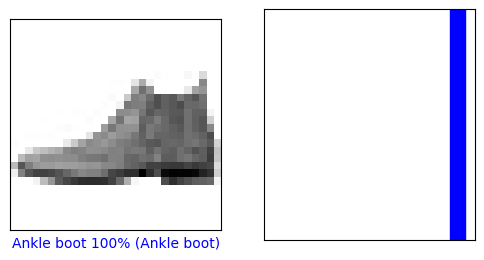

In [35]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

ข้างบนเป็นตัวอย่างที่ทายถูก ซึ่งความน่าจะเป็นไม่ถือว่าสูงเท่าใดนัก เพราะเครื่องยังคิดว่ามีโอกาสเป็นเสื้อทีเชิร์ตและรองเท้าหุ้มส้นอยู่บ้าง อันดับต่อไป เราจะลองมาดูตัวอย่างที่เครื่องทายผิด

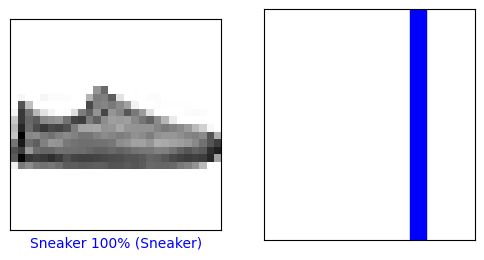

In [36]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

คราวนี้เครื่องทายว่าเป็นรองเท้าแตะแบบเหมือนเดามา คือคิดว่าโอกาสเป็นรองเท้าแตะอยู่ที่ 57% ในขณะที่เฉลยคือรองเท้าหุ้มส้น ซึ่งมีความน่าจะเป็นเพียงประมาณครึ่งหนึ่งของรองเท้าแตะ (แท่งสีน้ำเงิน)

## กระหน่ำพล็อตเป็นชุด
ดูทีละภาพมันก็ช้าไป ถ้าอยากได้แบบเป็นชุด ก็ต้องจัดพื้นที่แสดงผลใหม่และวนลูปพล็อตลงในพื้นที่ที่เตรียมไว้ ในตัวอย่างนี้ เราระบุได้เลยว่าอยากให้มันแสดงภาพออกมากี่แถวและกี่คอลัมน์ (กำหนดผ่านตัวแรป num_rows และ num_columns) ซึ่งการจัดพื้นที่ก็จะปรับขอบเขตตามนั้นด้วย (สังเกตด้วยว่าจำนวนคอลัมน์จะถูกคูณสอง เพราะเวลาที่เราพล็อต 1 ภาพ จริง ๆ แล้วเราพล็อตทั้งภาพและบาร์กราฟ)

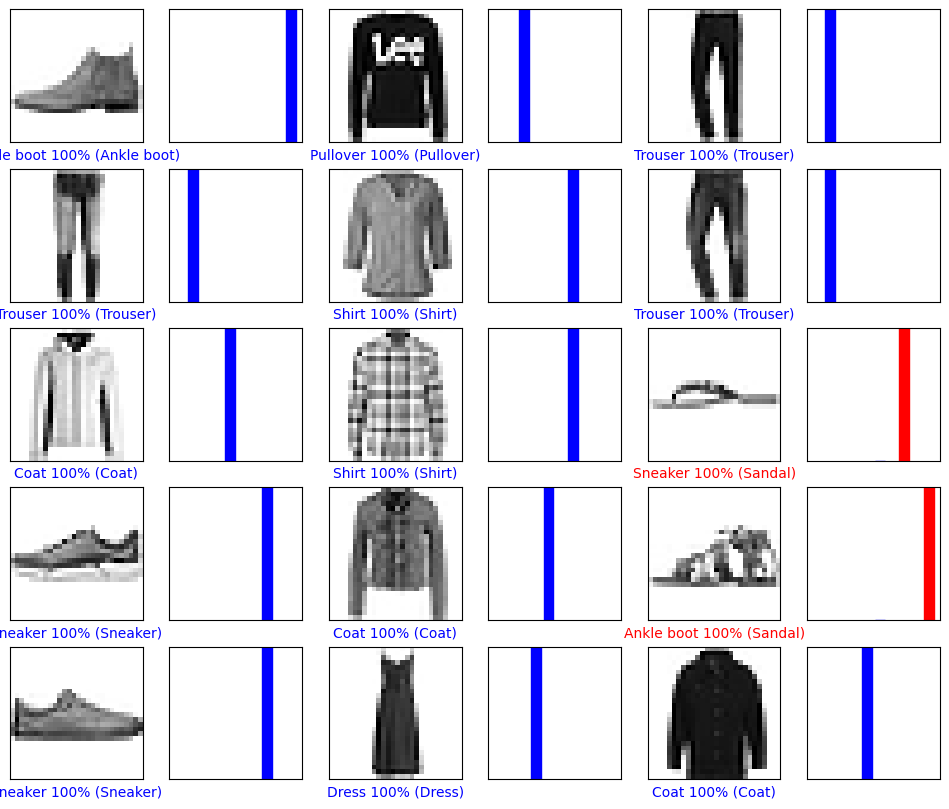

In [37]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)

**ส่งท้าย ใส่ชื่อคลาสลงไปในบาร์กราฟใต้แกน x**
ก่อนหน้านี้ เราอยากประหยัดพื้นที่แสดงผล เราจึงไม่แสดงชื่อคลาสไว้ด้วย ทำให้เราต้องคอยเทียบดูว่าตำแหน่งที่กราฟอยู่นั้นตรงกับคลาสใด แต่หากเราไม่ติดขัดเรื่องพื้นที่แสดงผล และอยากสื่อสารให้ชัดเจนขึ้น เราควรใส่ชื่อคลาสกำกับลงไปด้วย

ซึ่ง matplotlib ทำหน้าที่ตรงนี้ได้อย่างสวยงาม คือเราสามารถบอกได้ด้วยว่าจะให้ตัวอักษรชื่อคลาสที่อยู่ด้านใต้แกน x นี้เอียงกี่องศา

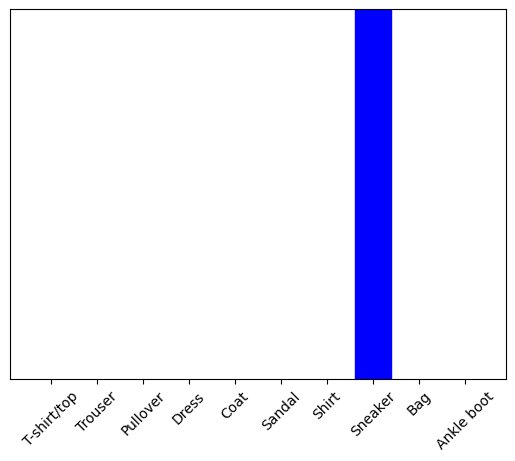

In [38]:
plot_value_array(12, predictions, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

-จบตอน